In [1]:
#importing necessary liabrary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading the file
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv',header=0)

In [3]:
df.head(10)# to see firt 10 rows of the data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


##Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, 
#Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#R – Runs scored: number of times a player crosses home plate
#AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
#H – Hit: reaching base because of a batted, fair ball without error by the defense
#2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
#3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
#HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
#BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
#SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
##Output: Number of predicted wins (W)


In [4]:
df.shape# to know the size of the data set

(30, 17)

In [5]:
df.info()# for getting information about the data set,and checking it's type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


#ERA is the only feature ,that's type is Float. other then all features are Integer type. Data is continous, so it is a regression problem.

In [6]:
df.describe().T # describing the data set

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [41]:
df.isnull().sum()# check for null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
# no null values present

In [8]:
df.W.unique()# checking unique values of  our target (output)

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

#analysing our Target value


<AxesSubplot:xlabel='W', ylabel='Density'>

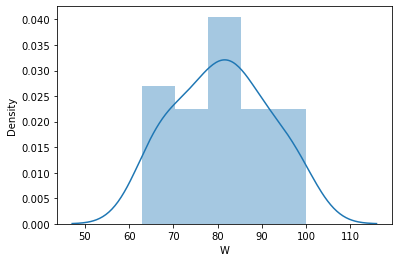

In [9]:
sns.distplot(df.W)

#it looks like normal distribution.

<AxesSubplot:xlabel='W', ylabel='Count'>

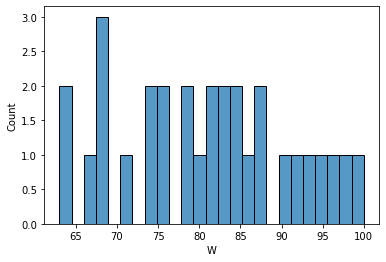

In [10]:
sns.histplot(df.W, bins=25)

In [11]:
#there are 16 features ,need check the relationship with the target value.

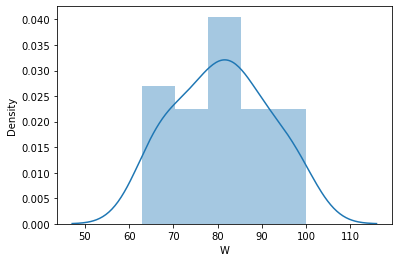

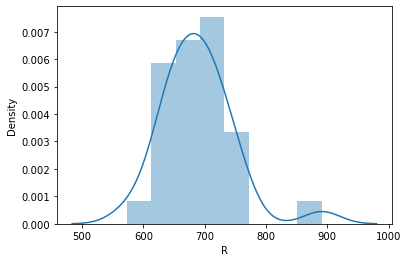

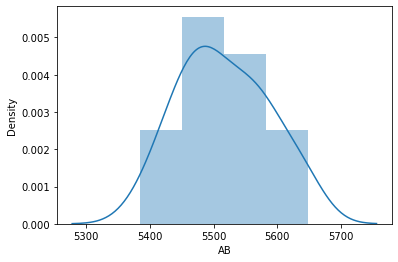

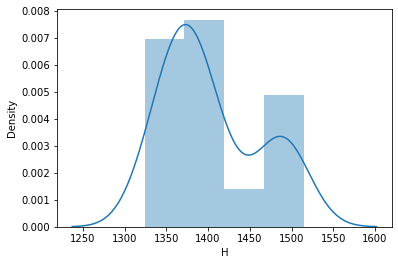

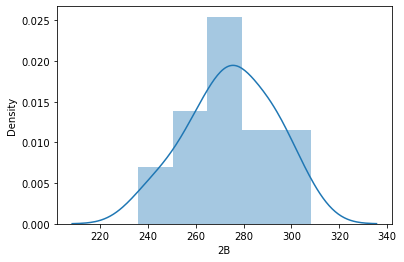

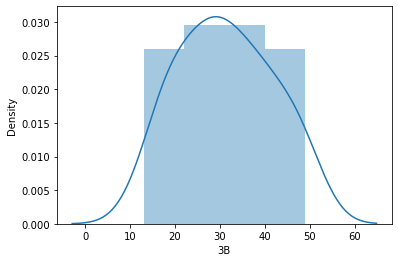

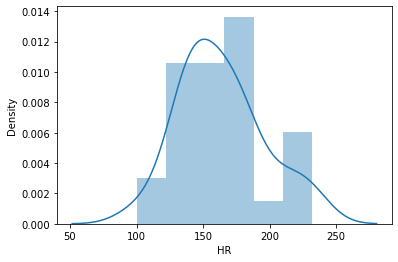

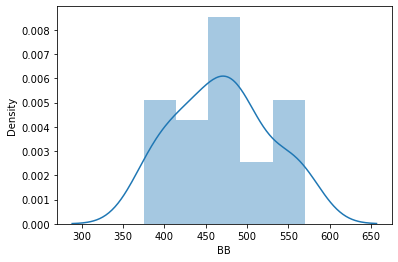

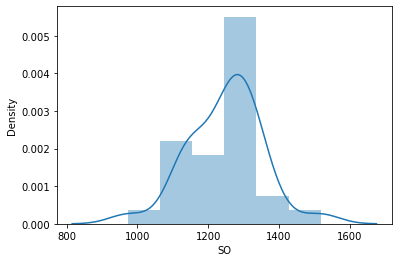

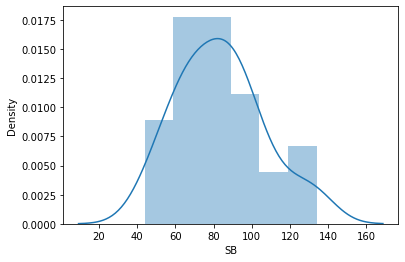

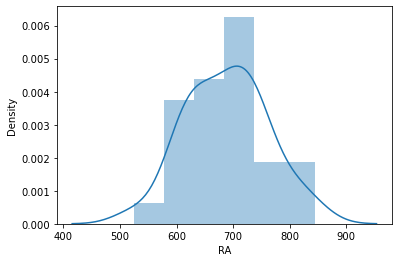

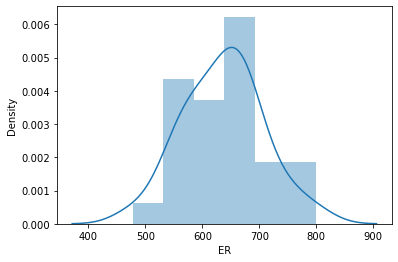

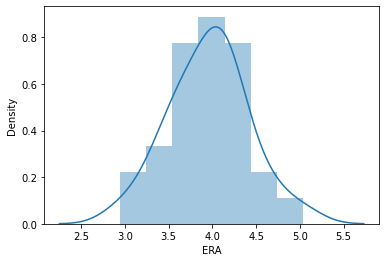

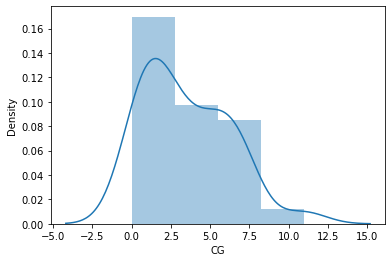

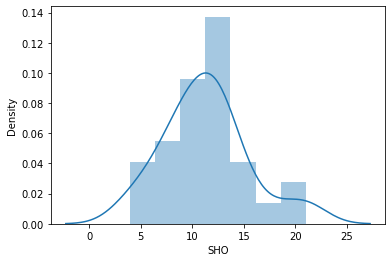

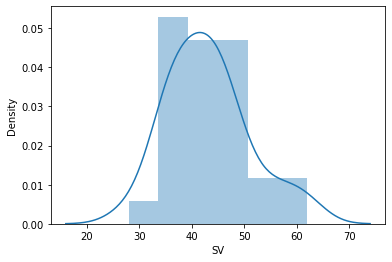

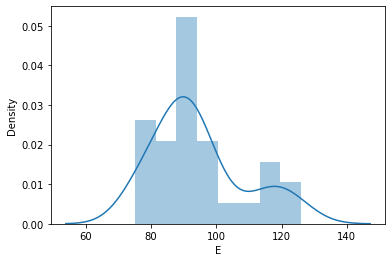

In [12]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [13]:
#R  -  is right skewed data with peak
# AB  - looks like normal distribution
# H - Bipolar distributed data
#2B  - little bit skewed at left
#3B  - kind of normal distribution
# HR - some skewness on both side
#BB  - have little skewness on both the side
# SO  - skewed data on both sides
#SB -skewed at right
#RA - skewed 
# ER  - lil skewed data
# ERA - looks normal distributed
# CG - not at allnormal distributed data
#  SHO- is right skewed data with peak
#SV - right skewed
#E Bipolar data

In [14]:
df.corr()# checking Correlation

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [15]:
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:>

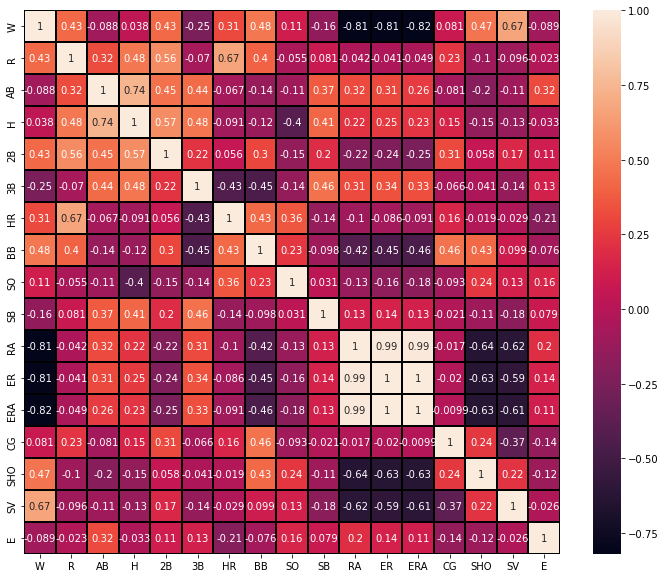

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linecolor='Black',linewidths=.25)

In [17]:
## Correlation analysis of First independent vs dependent

# R,HR,2B,BB,SHO, SV is good correlated with target variable (W)

# AB,3B, H,SO,SB,CG,E  are low correlated with target variable (+ and -)

# RA, ER, ERA  are highly negative correlated, we have to further check before drop any of them.
# RA, ER, ERA  are highly correlated to each other. these feature can be bias the output. we have to take care of that.
# AB and H are strong correlated to each other 74%

#Exploratory Data Analysis

<AxesSubplot:xlabel='R', ylabel='W'>

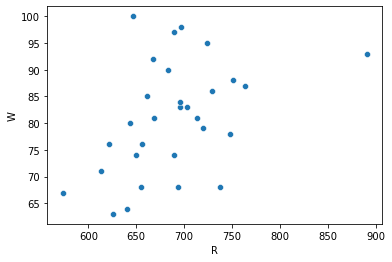

In [18]:
sns.scatterplot('R','W',data=df)

In [19]:
# Runs have positive graph with Win, more runs are the probability for win

<AxesSubplot:xlabel='AB', ylabel='W'>

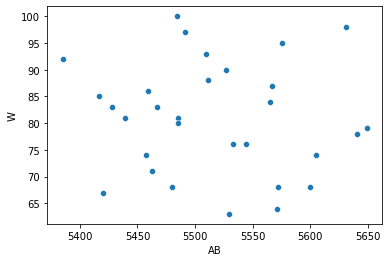

In [20]:
sns.scatterplot('AB','W',data=df)

In [21]:
#data is not follow any pattern.it  means low corrlerted with target.  

<AxesSubplot:xlabel='H', ylabel='W'>

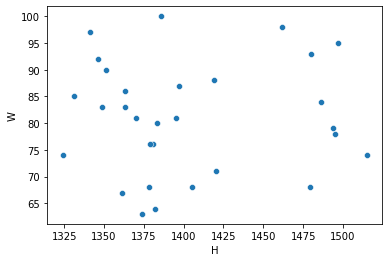

In [22]:
sns.scatterplot('H','W',data=df)

In [56]:
# data distribution not in any directioon, low correlated with Win ,we can drop ths feature.

<AxesSubplot:xlabel='2B', ylabel='W'>

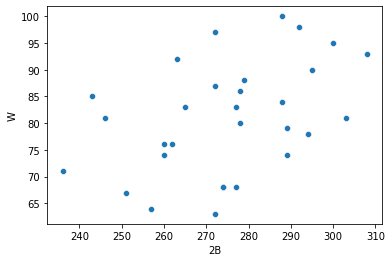

In [58]:
sns.scatterplot('2B','W',data=df)

In [23]:
#positively correlated with win(traget).

<AxesSubplot:xlabel='3B', ylabel='W'>

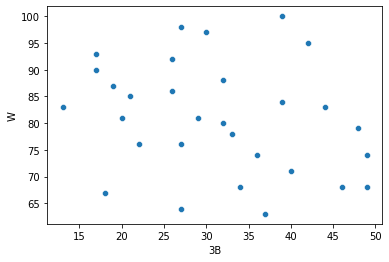

In [24]:
sns.scatterplot('3B','W',data=df)

In [25]:
# this distribution is low correlated, it will not help much in traget achievment.

<AxesSubplot:xlabel='HR', ylabel='W'>

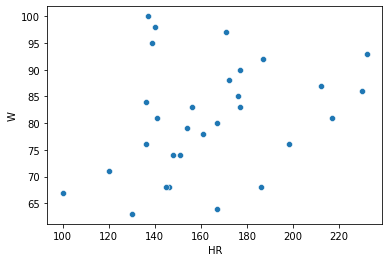

In [26]:
sns.scatterplot('HR','W',data=df)

In [27]:
# showing positive correlation


<AxesSubplot:xlabel='BB', ylabel='W'>

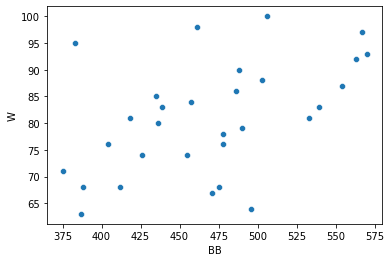

In [28]:
sns.scatterplot('BB','W',data=df)

In [29]:
# indicting positive correlation

<AxesSubplot:xlabel='SO', ylabel='W'>

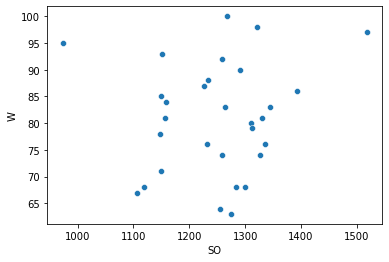

In [30]:
sns.scatterplot('SO','W',data=df)

In [31]:
# low correlated wiht target

<AxesSubplot:xlabel='SB', ylabel='W'>

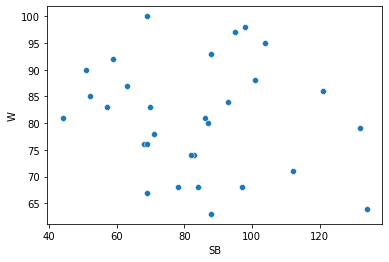

In [32]:
sns.scatterplot('SB','W',data=df)

In [33]:
#  SB is negatively correlated with the target

<AxesSubplot:xlabel='RA', ylabel='W'>

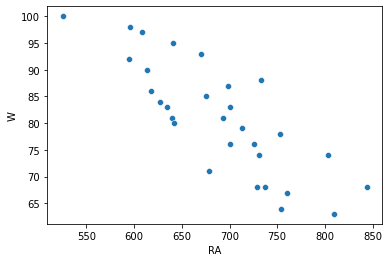

In [34]:
sns.scatterplot('RA','W',data=df)

In [35]:
# highly negative correlation with the target

<AxesSubplot:xlabel='ER', ylabel='W'>

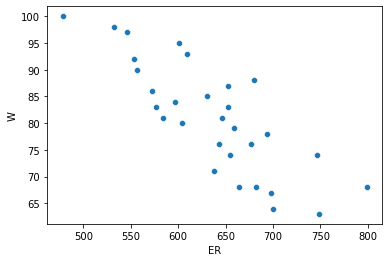

In [36]:
sns.scatterplot('ER','W',data=df)

In [37]:
# extream negative correlation

<AxesSubplot:xlabel='ERA', ylabel='W'>

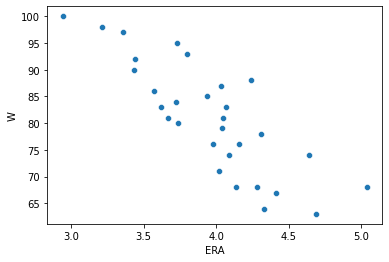

In [38]:
sns.scatterplot('ERA','W',data=df)

In [39]:
# highly negative correlation

<AxesSubplot:xlabel='CG', ylabel='W'>

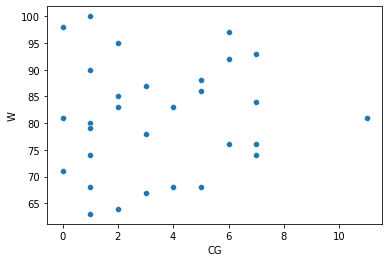

In [40]:
sns.scatterplot('CG','W',data=df)

In [41]:
#very low correlation with win

<AxesSubplot:xlabel='SHO', ylabel='W'>

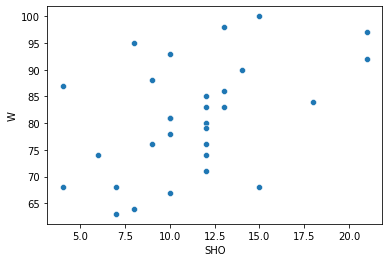

In [42]:
sns.scatterplot('SHO','W',data=df)

In [43]:
# positive correlation with target

<AxesSubplot:xlabel='SV', ylabel='W'>

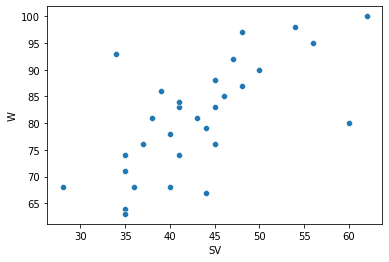

In [44]:
sns.scatterplot('SV','W',data=df)

In [45]:
# positive correlation with target

<AxesSubplot:xlabel='SV', ylabel='W'>

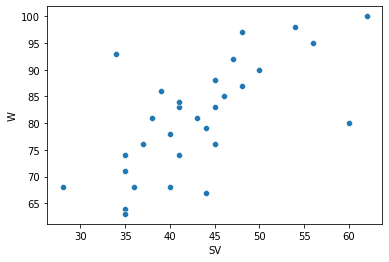

In [46]:
sns.scatterplot('SV','W',data=df)

In [47]:
# positive correlation with target

<AxesSubplot:xlabel='E', ylabel='W'>

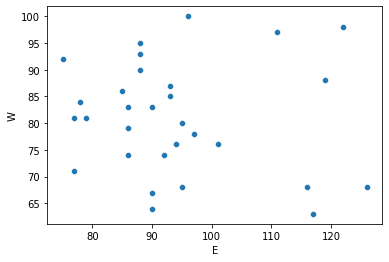

In [48]:
sns.scatterplot('E','W',data=df)

In [49]:
#low correlation with wins

# Observation:
some features are very low correlated with target variable and some are having negative correlation.
there are multicolinearity is also present, some independent feature are highly correlated to each other.

<AxesSubplot:xlabel='R', ylabel='W'>

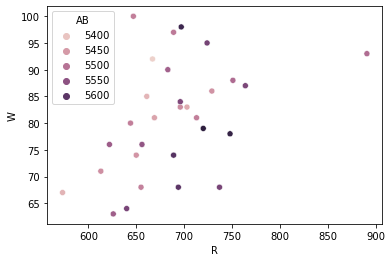

In [50]:
sns.scatterplot('R','W',hue='AB',data=df)

In [51]:
#checking unique values
for i in df.columns:
    df[i].nunique()
    print("unique values of features ",i, '= ',df[i].nunique())

unique values of features  W =  24
unique values of features  R =  28
unique values of features  AB =  29
unique values of features  H =  29
unique values of features  2B =  22
unique values of features  3B =  23
unique values of features  HR =  27
unique values of features  BB =  29
unique values of features  SO =  29
unique values of features  SB =  27
unique values of features  RA =  30
unique values of features  ER =  30
unique values of features  ERA =  30
unique values of features  CG =  9
unique values of features  SHO =  12
unique values of features  SV =  20
unique values of features  E =  21


In [52]:
df.CG.unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

<AxesSubplot:xlabel='R', ylabel='W'>

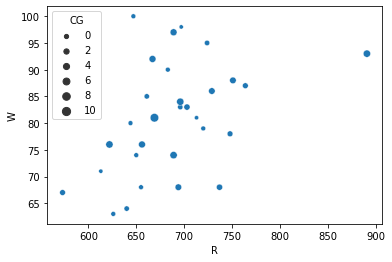

In [53]:
sns.scatterplot('R','W',size='CG',data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

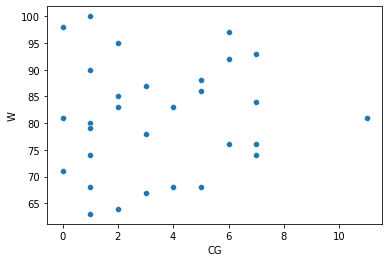

In [54]:
sns.scatterplot('CG','W',data=df)

In [55]:
#CG(complete game) is not the assurance of win, some time you may not win the match after playing complete game.

<AxesSubplot:xlabel='ER', ylabel='RA'>

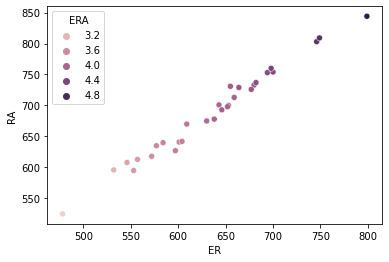

In [56]:
sns.scatterplot('ER', 'RA', hue='ERA',data=df)

In [57]:
# Earned runs is the key counting statistic used in ERA, the most widely accepted barometer of success. If there are no errors or passed balls in a given inning or game, all the runs in that inning or game are earned runs.

# RA and ER seems the same thing, RA - run scored by opponent and ER earned run allowed without any errors

In [58]:
#Good correlation..lets explore it.

In [59]:
##VIF to find multicolinearity

In [60]:
v= df.drop('W', axis=1)
v.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [61]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(v)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
VIF= pd.DataFrame()
VIF['features']=v.columns

In [64]:
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [65]:
VIF

,features,vif
0,R,11.522370
1,AB,13.311532
2,H,10.070668
3,2B,4.019297
4,3B,3.294146
5,HR,10.079902
6,BB,3.806098
7,SO,2.652401
8,SB,2.102684
9,RA,191.839155


In [66]:
# Most of the features have more than 5 VIF, 
# drop 'ER'
v= df.drop(['W','ER'], axis=1)

In [67]:
v.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86


In [68]:
scaled=sc.fit_transform(v)

In [69]:
VIF2= pd.DataFrame()
VIF2['features']=v.columns

VIF2['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF2

,features,vif
0,R,11.158733
1,AB,5.863764
2,H,9.628749
3,2B,3.786446
4,3B,3.293109
5,HR,9.057309
6,BB,3.791451
7,SO,2.607389
8,SB,1.849280
9,RA,122.133235


In [70]:
# Drop RA 
v= df.drop(['W','ER','RA'], axis=1)

In [71]:
scaled=sc.fit_transform(v)

In [72]:
VIF3= pd.DataFrame()
VIF3['features']=v.columns

VIF3['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF3

,features,vif
0,R,10.987898
1,AB,4.399954
2,H,8.941874
3,2B,3.729413
4,3B,3.142717
5,HR,7.882841
6,BB,3.468244
7,SO,2.155496
8,SB,1.819823
9,ERA,4.951981


In [73]:
v.head(4)

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101


In [74]:
v.tail(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
28,650,5457,1324,260,36,148,426,1327,82,4.09,1,6,41,92
29,737,5572,1479,274,49,186,388,1283,97,5.04,4,4,36,95


<AxesSubplot:>

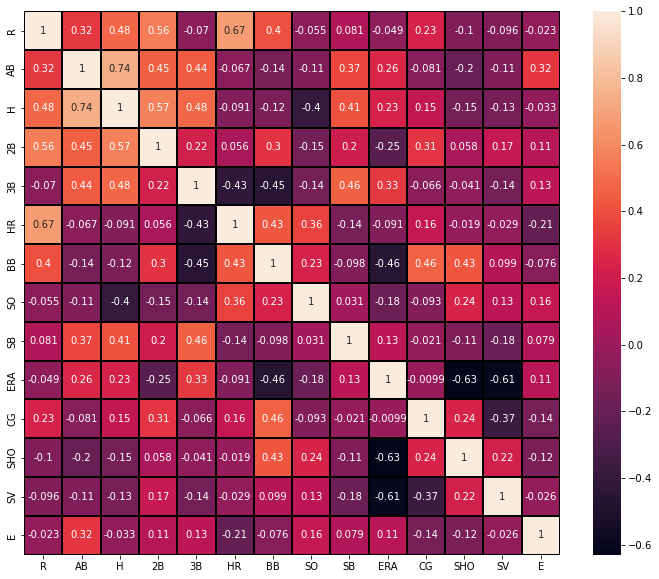

In [75]:
plt.figure(figsize=(12,10))
sns.heatmap(v.corr(), annot=True,linecolor='black', linewidths=.25)

In [76]:
v.skew()# to check the skewness of data set

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [77]:
## check for Outliers

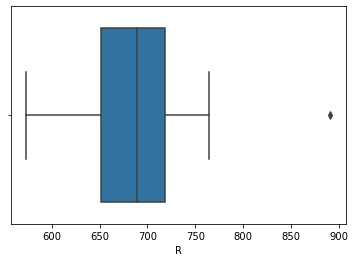

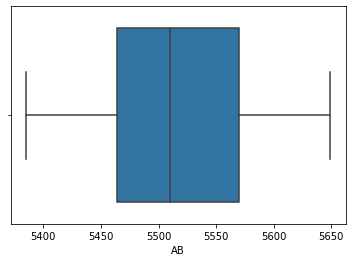

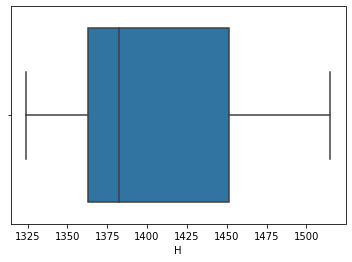

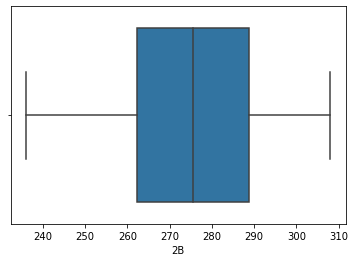

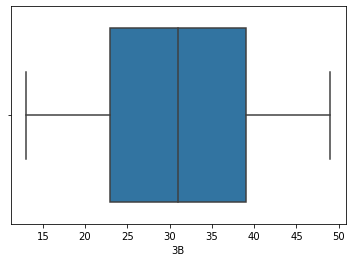

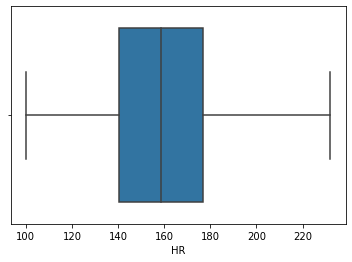

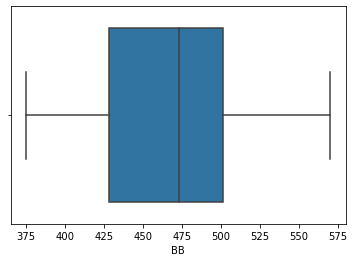

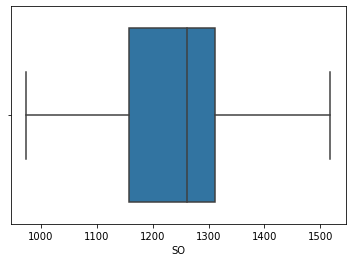

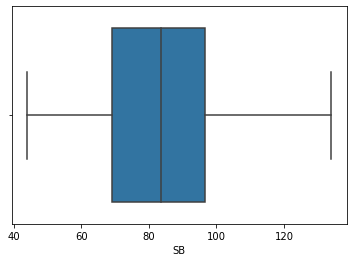

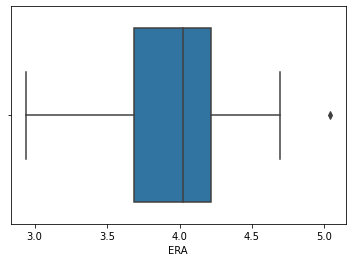

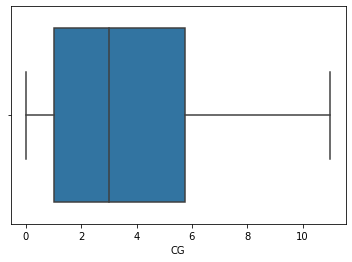

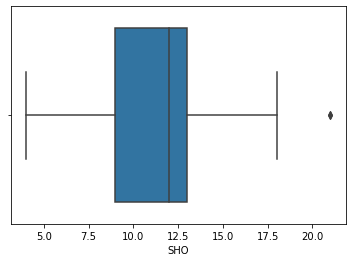

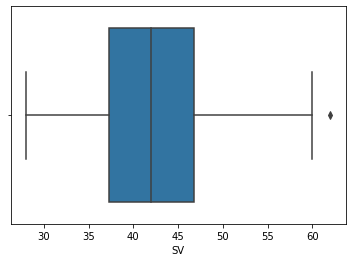

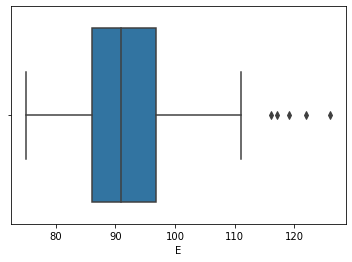

In [78]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [79]:
#Outliers are there in upper range of features R , ERA , SHO , SV , E .need to handle them

In [80]:
IQR= df['R'].quantile(.75)-df['R'].quantile(.25)
IQR
upper= df['R'].quantile(.75) +( 1.5 * IQR)
upper

818.75

In [81]:
v['R']= np.where(v['R']>upper,upper,v['R'])

In [82]:
IQR= df['ERA'].quantile(.75)-df['ERA'].quantile(.25)
IQR
upper= df['ERA'].quantile(.75) +( 1.5 * IQR)
upper


5.026250000000001

In [83]:
v['ERA']= np.where(v['ERA']>upper,upper,v['ERA'])

In [84]:
IQR= df['E'].quantile(.75)-df['E'].quantile(.25)
IQR
upper= df['E'].quantile(.75) +( 1.5 * IQR)
upper

112.875

In [85]:
v['E']= np.where(v['E']>upper,upper,v['E'])

In [86]:
IQR= df['SHO'].quantile(.75)-df['SHO'].quantile(.25)
IQR
upper= df['SHO'].quantile(.75) +( 1.5 * IQR)
upper

19.0

In [87]:
v['SHO']= np.where(v['SHO']>upper,upper,v['SHO'])

In [88]:
IQR= df['SV'].quantile(.75)-df['SV'].quantile(.25)
IQR
upper= df['SV'].quantile(.75) +( 1.5 * IQR)
upper

61.0

In [89]:
v['SV']= np.where(v['SV']>upper,upper,v['SV'])

In [90]:
IQR= df['E'].quantile(.75)-df['E'].quantile(.25)
IQR
upper= df['E'].quantile(.75) +( 1.5 * IQR)
upper

112.875

In [91]:
v['E']= np.where(v['E']>upper,upper,v['E'])

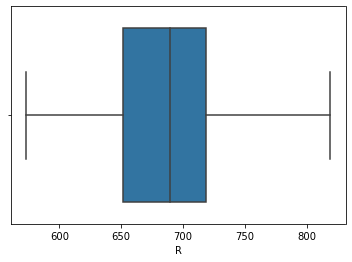

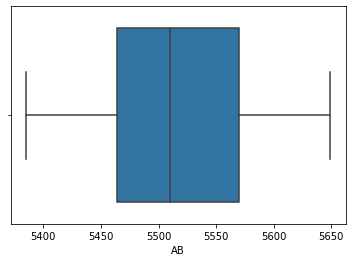

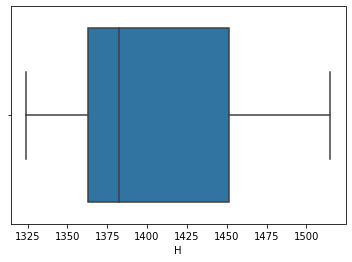

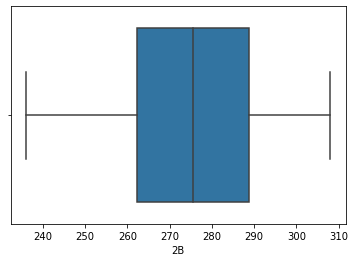

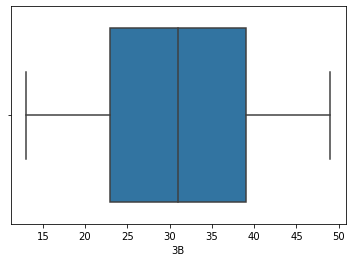

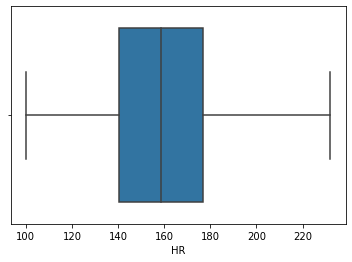

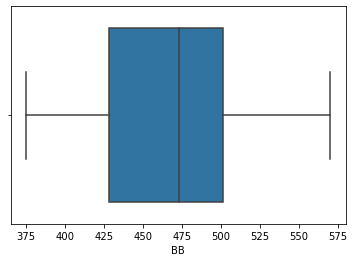

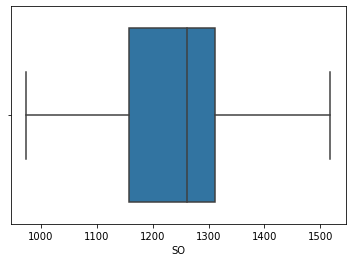

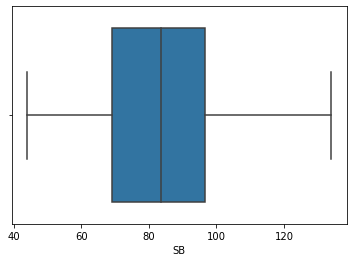

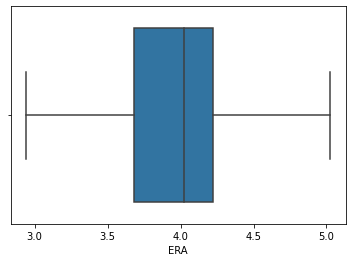

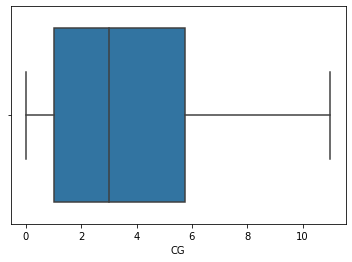

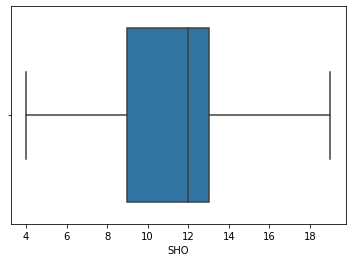

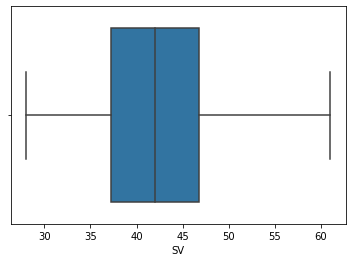

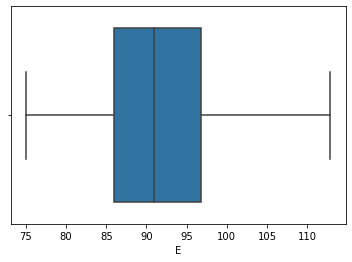

In [92]:
for i in v.columns:
    sns.boxplot(v[i])
    plt.show()

In [93]:
#we handled the outliers

In [94]:
v.skew()

R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

In [95]:
#handling outliers help us to remove skewness as well

In [96]:
#Transformation of the data set

In [97]:
from sklearn.preprocessing import power_transform
transformed=power_transform(v)

In [98]:
transformed=pd.DataFrame(transformed)
transformed.columns=v.columns   

In [99]:
transformed.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
ERA    0.001204
CG    -0.059785
SHO   -0.017889
SV     0.001270
E      0.032939
dtype: float64

In [100]:
transformed.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.502797,-0.359844,-0.827928,1.564693,-0.357505
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.261440,-0.359844,0.258244,0.361185,-0.560947
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.638366,1.993513,-0.272431,-0.611107,-1.355876
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.059785,1.220103,-0.546703,-0.767843,0.764697
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.528523,1.220103,0.258244,-1.097417,-0.560947


#Standardization

In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(transformed)

In [102]:
X= scaled

In [103]:
Y=df['W']

In [104]:
X.shape

(30, 14)

In [105]:
Y.shape

(30,)

In [106]:
#Machine Learning

In [107]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [108]:
# Train Test Split / finding best random_state for the model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('='*50,'\n')

At random state  30 The model performance very well
At random state:  30
Test R2 score is:  0.84
Train R2 score is:  0.84

At random state  47 The model performance very well
At random state:  47
Test R2 score is:  0.85
Train R2 score is:  0.85

At random state  99 The model performance very well
At random state:  99
Test R2 score is:  0.85
Train R2 score is:  0.85

At random state  175 The model performance very well
At random state:  175
Test R2 score is:  0.86
Train R2 score is:  0.86



In [109]:
# Select Random state= 175

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=175,test_size=.2)
LR.fit(x_train,y_train)

LinearRegression()

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [112]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('=' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 2.7264065961746673
mean_square_error of LinearRegression() model 13.319637960999806
R2 Score of LinearRegression() model 86.25266724208736


mean_absolute_error of  Ridge() model 2.294706185531917
mean_square_error of Ridge() model 11.152294329870855
R2 Score of Ridge() model 88.48960447605072


mean_absolute_error of  Lasso() model 2.851798496410254
mean_square_error of Lasso() model 9.180635618736224
R2 Score of Lasso() model 90.524573329286


mean_absolute_error of  DecisionTreeRegressor() model 7.166666666666667
mean_square_error of DecisionTreeRegressor() model 64.5
R2 Score of DecisionTreeRegressor() model 33.428899082568805


mean_absolute_error of  SVR() model 8.005345608904014
mean_square_error of SVR() model 91.1232721063577
R2 Score of SVR() model 5.950751266373944


mean_absolute_error of  KNeighborsRegressor() model 6.233333333333332
mean_square_error of KNeighborsRegressor() model 55.53999999999997
R2 Score of KNeighborsReg

In [113]:
#CROSS Validation

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('='*50)

mean_square of  LinearRegression() model 13.319637960999806
cross Validation score of  LinearRegression()  is  -55.10832658669841
mean_square of  Ridge() model 11.152294329870855
cross Validation score of  Ridge()  is  -47.703110230419824
mean_square of  Lasso() model 9.180635618736224
cross Validation score of  Lasso()  is  -38.001201439016555
mean_square of  DecisionTreeRegressor() model 64.5
cross Validation score of  DecisionTreeRegressor()  is  -97.76666666666667
mean_square of  SVR() model 91.1232721063577
cross Validation score of  SVR()  is  -101.43654219683
mean_square of  KNeighborsRegressor() model 55.53999999999997
cross Validation score of  KNeighborsRegressor()  is  -80.90266666666668
mean_square of  RandomForestRegressor() model 32.102049999999984
cross Validation score of  RandomForestRegressor()  is  -65.92343666666669
mean_square of  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,

In [116]:
##Hypertuning of XGBRegressor

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.01, 0.05,0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [119]:
GCV= GridSearchCV(XGB_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
     

In [120]:
GCV.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.01,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 3}

In [121]:
GCV_pred=GCV.best_estimator_.predict(x_test)
mean_squared_error(y_test,GCV_pred)

76.23911029390486

In [122]:
## error has been reduced to 76 from 81.98

In [123]:
##Saving model in pickle format

In [125]:
import joblib
joblib.dump(GCV.best_estimator_,"Baseball_CaseStudy.pkl")

['Baseball_CaseStudy.pkl']